# Decision Tree
## by Sklearn 

In [1]:
import numpy as np
import pandas as pd

### Reading The Data form drug200.csv

In [28]:
data = pd.read_csv('../data/drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Independent and Dependent Variables

In [149]:
label = list(data.columns[-1:])
attributes = list(data.columns[:-1])
# attributes.remove('Sex')   # Note 'Sex' is not a determining factor in this data set.

x = data[attributes]   # Independent Variables
y = data[label]        # Dependent Variables
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


### Preprocessing the Attributes
as Sklearn Decision Trees do not handle categorical variables.

In [151]:
from sklearn import preprocessing

for attribute in attributes:
    if type(x.loc[:,attribute][0]) == str:  # If values is a categorical variable
        attribute_values = np.unique(x.loc[:,attribute]) # x.loc[:,attribute].unique().tolist()   # list(set(x.loc[:,attribute]))
        x.loc[:,attribute] = preprocessing.LabelEncoder().fit(attribute_values).transform(x.loc[:,attribute])
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


### Spliting Train/Test Data 80:20

In [125]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2) 

### Training Decision Tree

In [126]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')   #  Criterion can be 'gini' or 'entropy'
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Prediction & Evaluation

In [146]:
y_hat = clf.predict(x_test)

from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_hat) * 100)
print("f1_Score: ", metrics.f1_score(y_test, y_hat, average='weighted'))

Accuracy:  100.0
f1_Score:  1.0


### Visualization

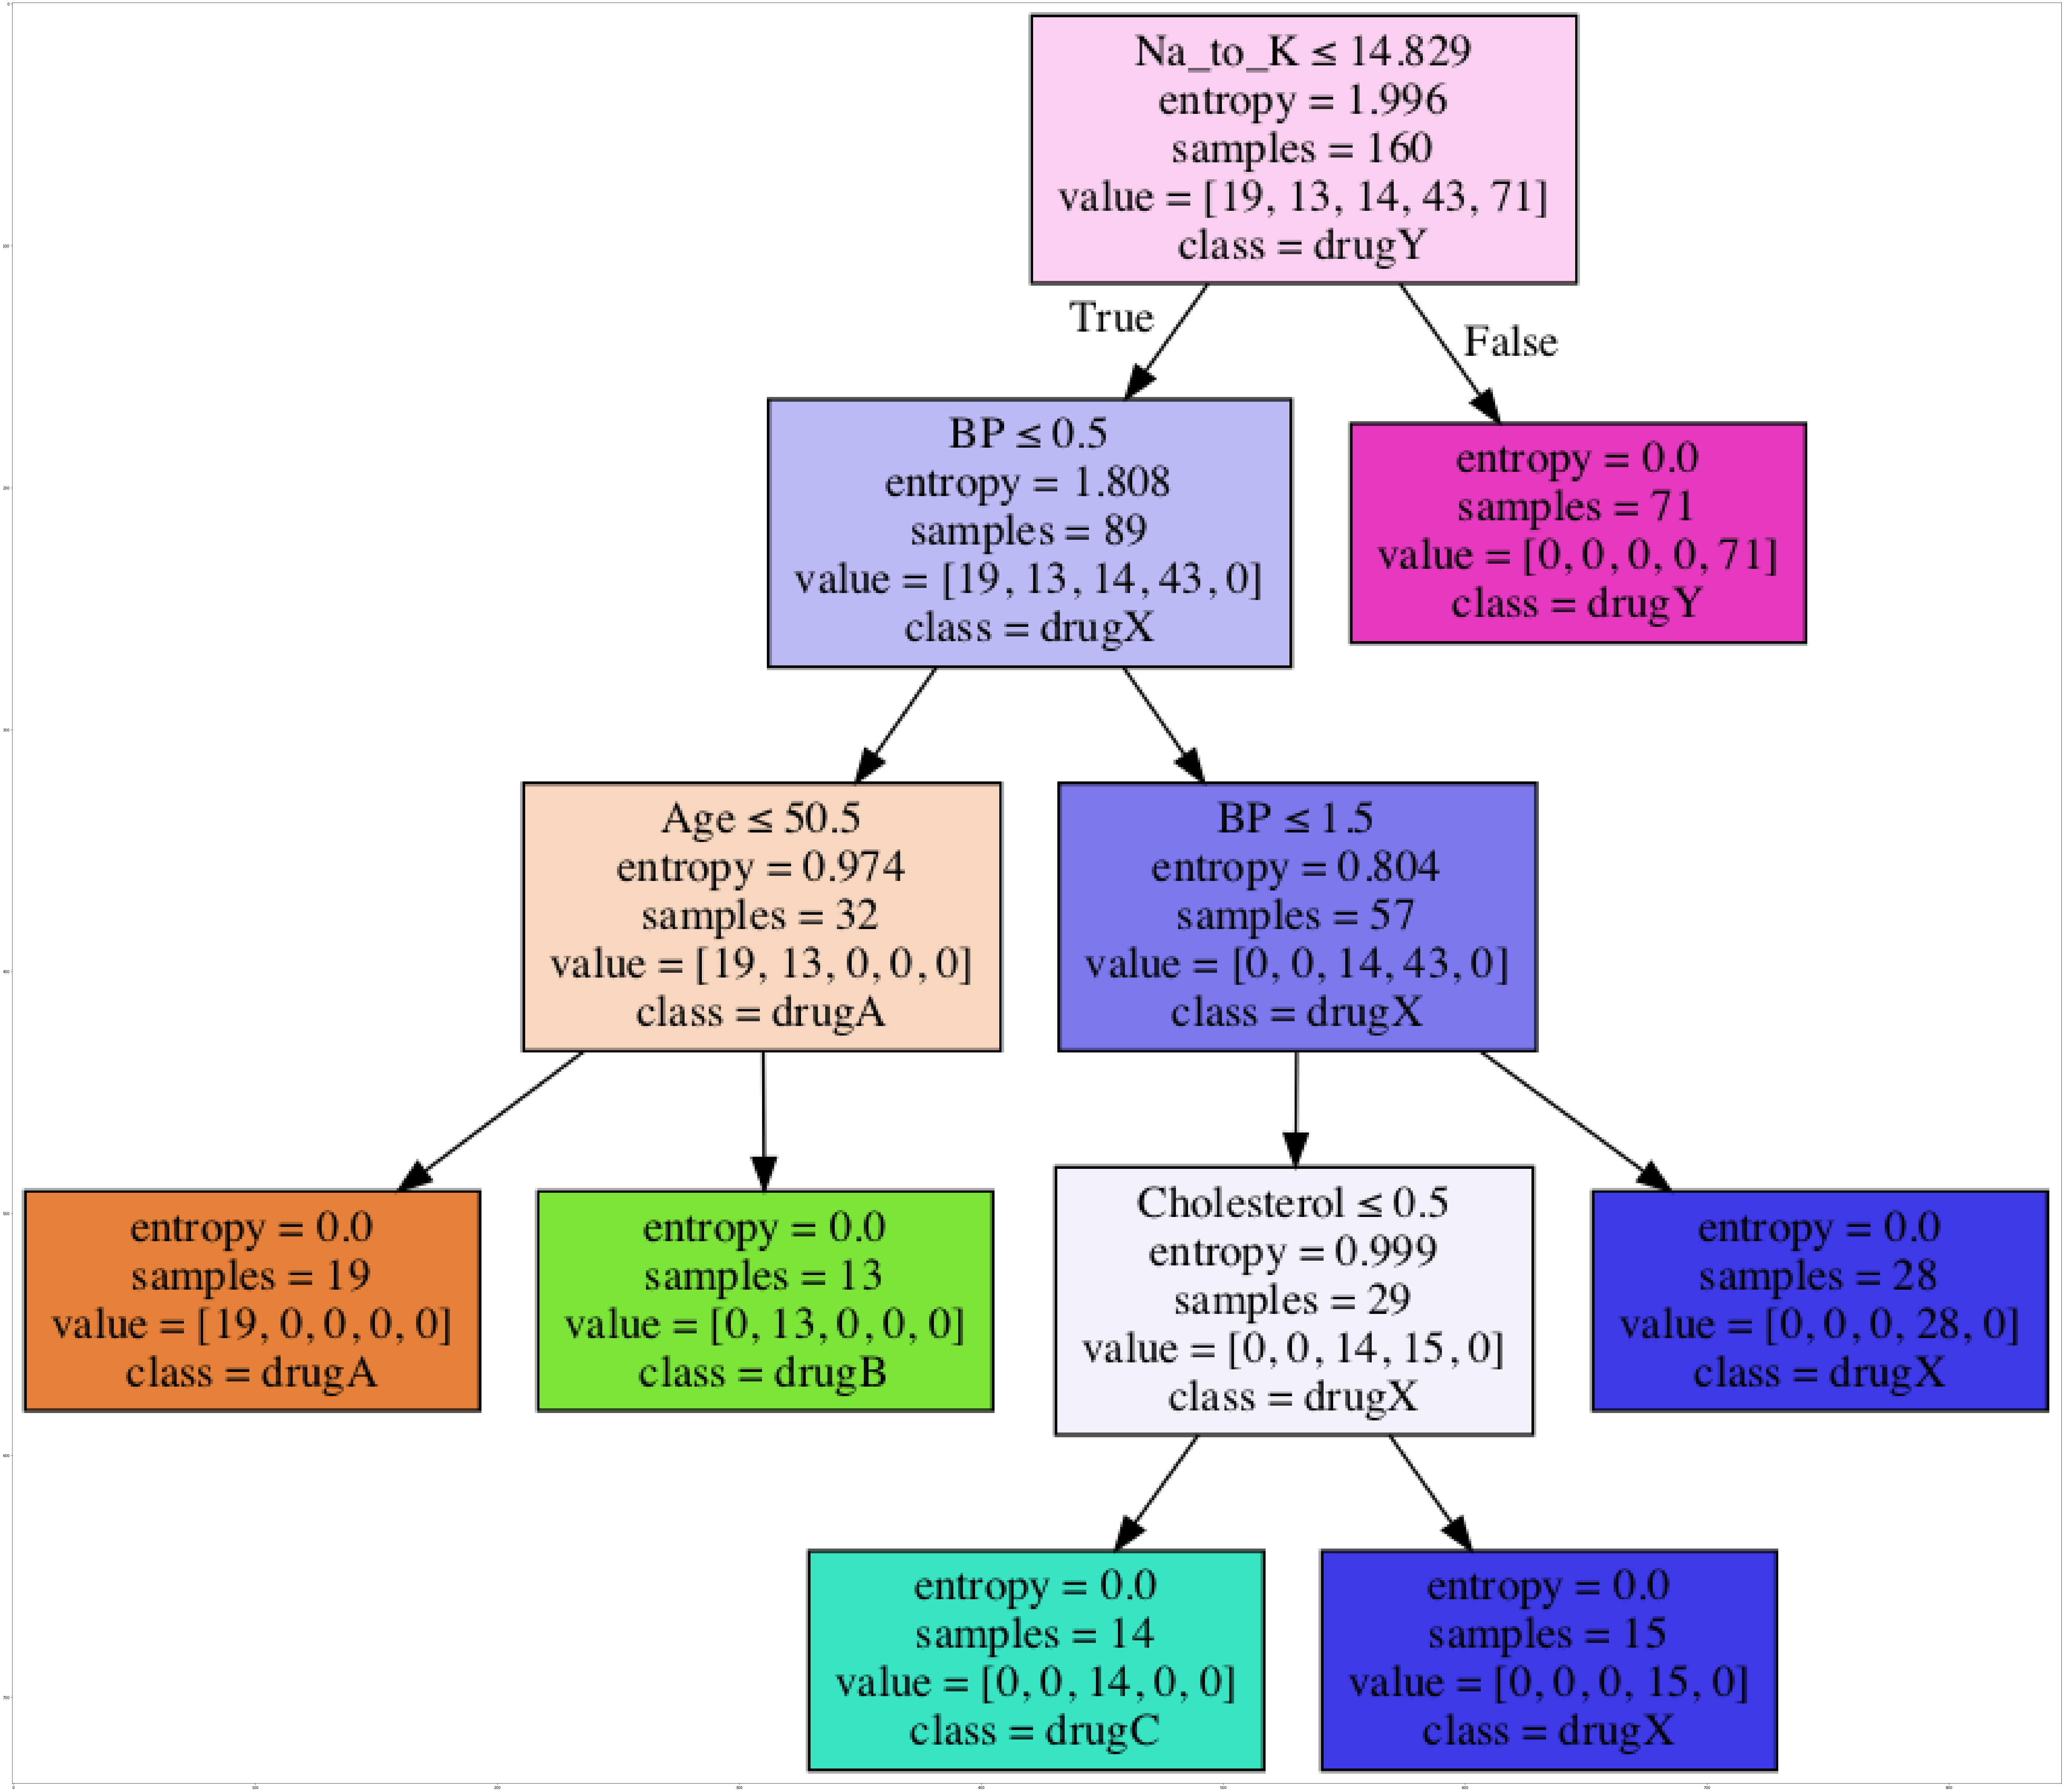

In [156]:
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()
filename = "decisionTree.png"
out = tree.export_graphviz(clf,feature_names=attributes, out_file=dot_data, class_names=np.unique(y_train), filled=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)


import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline 

img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')